### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

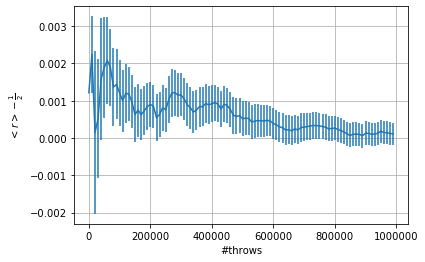

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

filein = open("1/out1.txt") # reading data from the output obtained with C++
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
x*=L
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()

plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<r>-\frac{1}{2}$')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

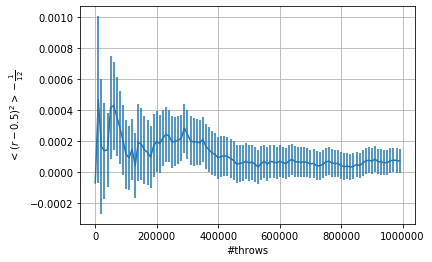

In [11]:
filein = open("1/out2.txt") # reading data from the output obtained with C++
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
x*=L
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()

plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<(r-0.5)^2>-\frac{1}{12}$')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

<χ^2> = 97.6865 +/- 2.22256


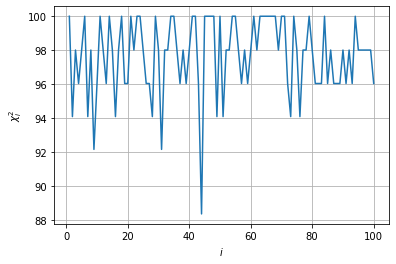

In [3]:
filein = open("1/out3.txt") # reading data from the output obtained with C++
avg_chi = float(filein.readline())
err_chi = float(filein.readline())
N = int(filein.readline())
chi = np.zeros(N)
for i in range(N):
    chi[i] = float(filein.readline())
filein.close()

print(u"<\u03C7^2> = "+str(avg_chi)+" +/- "+str(err_chi))
x = np.arange(N)
x = x+1
#plt.errorbar(x,chi,yerr=np.zeros(N)) # error to add
plt.plot(x,chi)
plt.xlabel(r'$i$')
plt.ylabel(r'$\chi^2_i$')
plt.grid(True)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_n = \frac{1}{n}\sum_{i=1}^n x_i$ (for $n=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $n=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

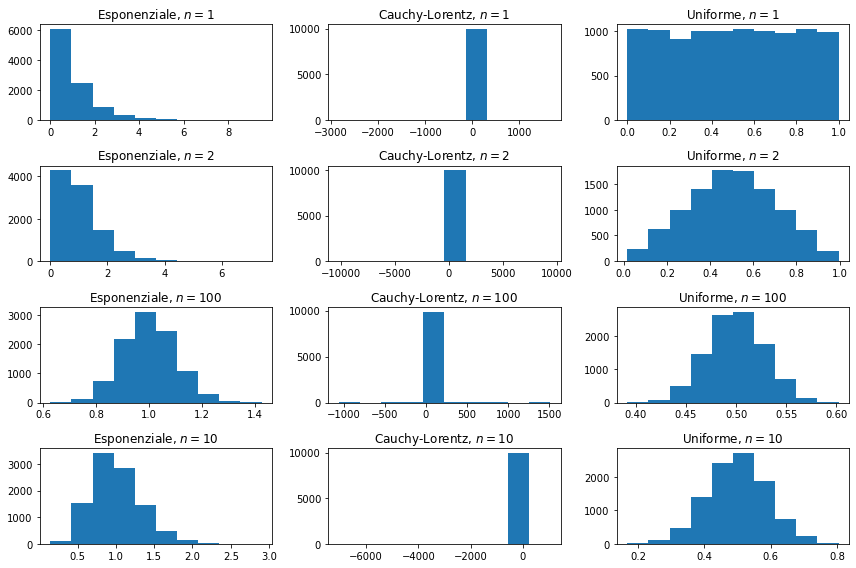

In [41]:
# To do:
# - why cl so peacked?

plt.rcParams["figure.figsize"]=(12,8)
fig, ax = plt.subplots(4, 3, tight_layout=True)
for i in range(4):
    filein = open("2/file"+str(i+1)+".txt")
    N = int(filein.readline())
    n = int(filein.readline())
    s_exp = np.zeros(N);
    s_cl = np.zeros(N);
    s = np.zeros(N);
    for j in range(N):
        s_exp[j] = float(filein.readline())
    for j in range(N):
        s_cl[j] = float(filein.readline())
    for j in range(N):
        s[j] = float(filein.readline())
    ax[i][0].hist(s_exp)
    ax[i][0].set_title(r'Esponenziale, $n='+str(n)+'$')
    ax[i][1].hist(s_cl)
    ax[i][1].set_title(r'Cauchy-Lorentz, $n='+str(n)+'$')
    ax[i][2].hist(s)
    ax[i][2].set_title(r'Uniforme, $n='+str(n)+'$')

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

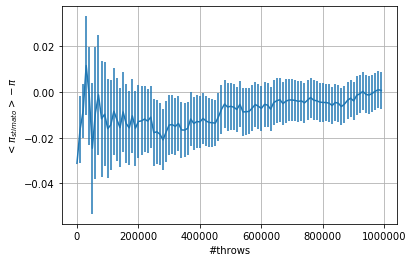

In [9]:
# To do:
# - modify C++ code not to use pi to determine pi
plt.rcParams["figure.figsize"]=(6,4)
filein = open("3/out.txt") # reading data from the output obtained with C++
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
x*=L
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()

plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<\pi_{stimato}>-\pi$')
plt.grid(True)
plt.show()